<a href="https://colab.research.google.com/github/Bhanureddy48/Applied-Data-Science-1/blob/main/Bhanu_Project_Battery_Range_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1= pd.read_csv("/content/Banu_Cheapestelectriccars-EVDatabase.csv") # Replace with your file name and its path


In [4]:
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [5]:
print(df1.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [6]:
#filling empty data with 0

df1=df1.fillna('0')

In [ ]:
#cleaning the data
#removing currency sign

PriceinUK=[]
for item in df1['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df1['PriceinUK']=PriceinUK

In [ ]:
PriceinGermany=[]
for item in df1['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df1['PriceinGermany']=PriceinGermany

In [ ]:
FastChargeSpeed=[]
for item in df1['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df1['FastChargeSpeed']=FastChargeSpeed

In [ ]:
Efficiency=[]
for item in df1['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df1['Efficiency']=Efficiency

In [ ]:
Range=[]
for item in df1['Range']:
    Range+=[int(item.replace(' km',''))]
df1['Range']=Range

In [ ]:
TopSpeed=[]
for item in df1['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df1['TopSpeed']=TopSpeed

In [ ]:
Acceleration=[]
for item in df1['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df1['Acceleration']=Acceleration

In [ ]:
Subtitle=[]
for item in df1['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df1['Subtitle']=Subtitle

In [ ]:
df1= df1.rename(columns = {'Subtitle':'KWH'})

In [ ]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 15.6+ KB


In [ ]:
cor = df1.drop(columns=['Name', 'Drive'])

In [ ]:
cor.corr()


,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753
PriceinUK,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000


<Axes: >

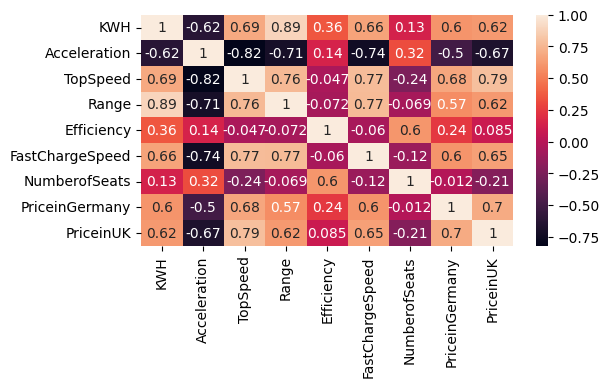

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(cor.corr(), annot=True)

<Axes: xlabel='Drive', ylabel='count'>

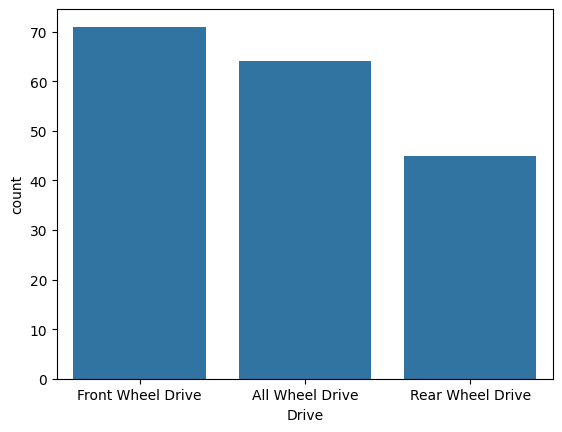

In [ ]:
sns.countplot(x = 'Drive', data = df1)

<Axes: xlabel='NumberofSeats', ylabel='count'>

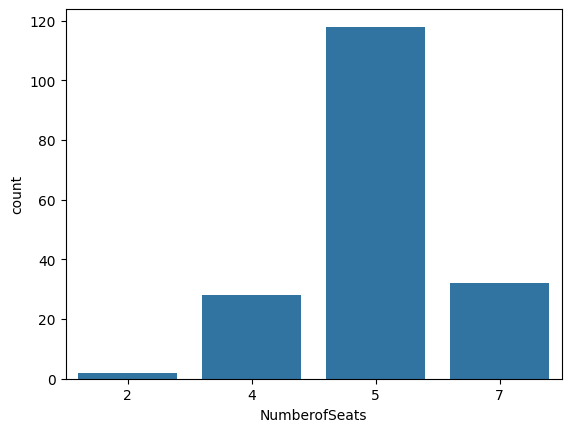

In [ ]:
sns.countplot(x = 'NumberofSeats', data = df1)

<Axes: xlabel='NumberofSeats', ylabel='count'>

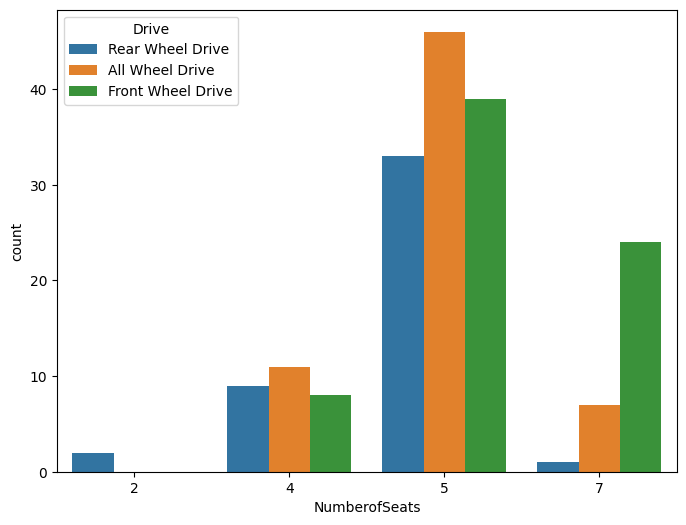

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df1)

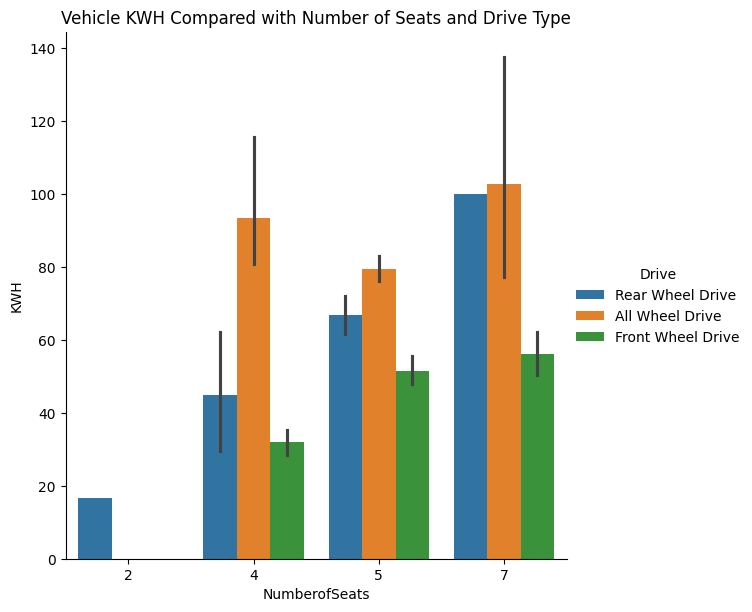

In [ ]:
sns.catplot(data=df1, kind="bar", x="NumberofSeats", y="KWH",height=6, hue="Drive")
plt.title("Vehicle KWH Compared with Number of Seats and Drive Type")
plt.show()

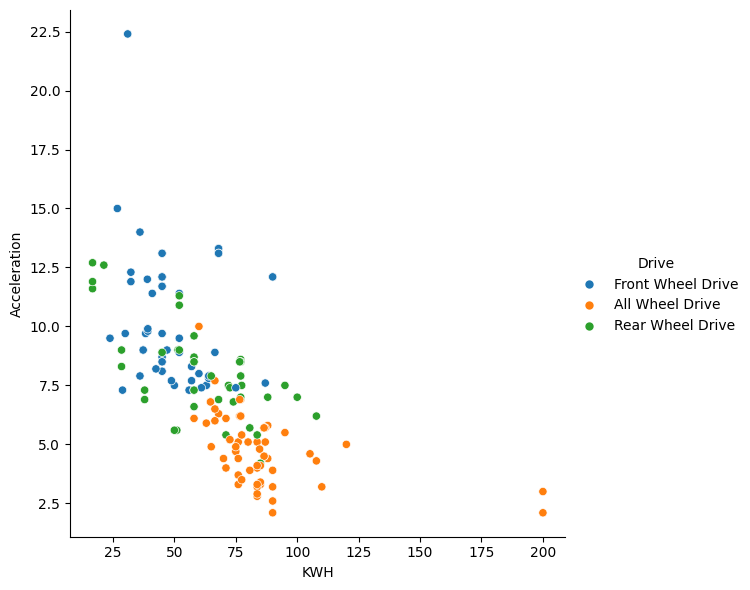

In [ ]:
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df1)

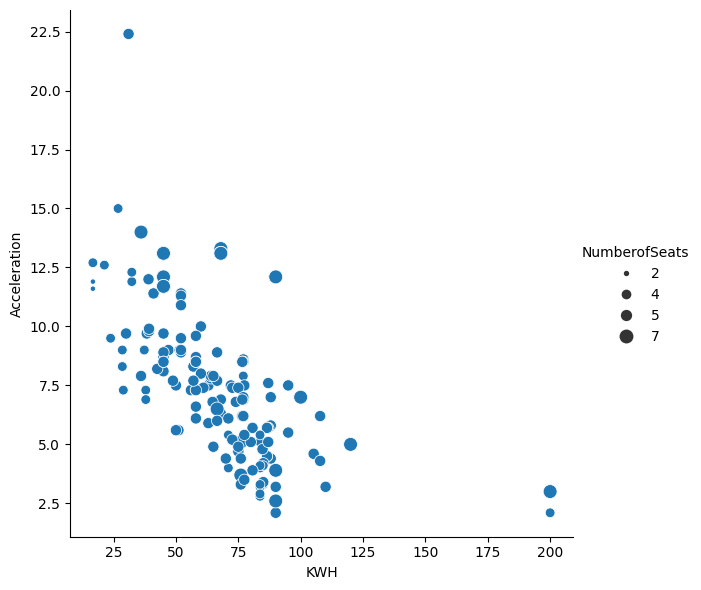

In [ ]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=6,sizes=(15, 100),data=df1)

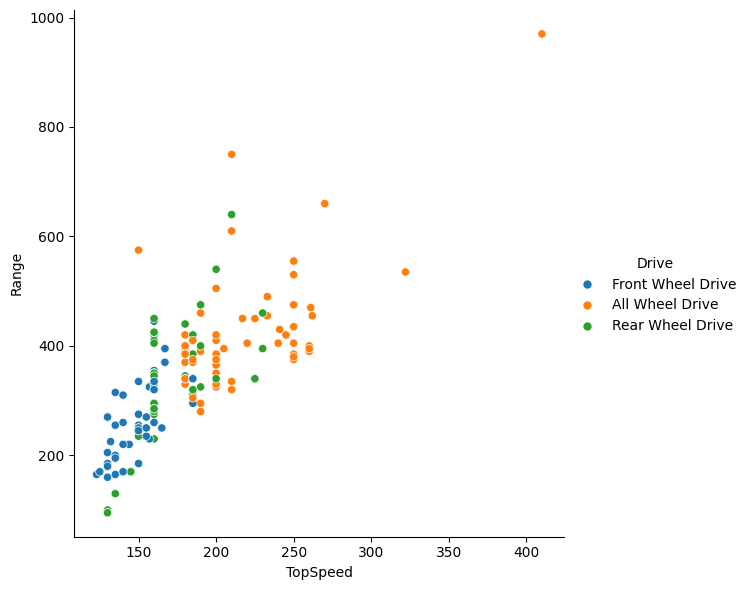

In [ ]:
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df1)

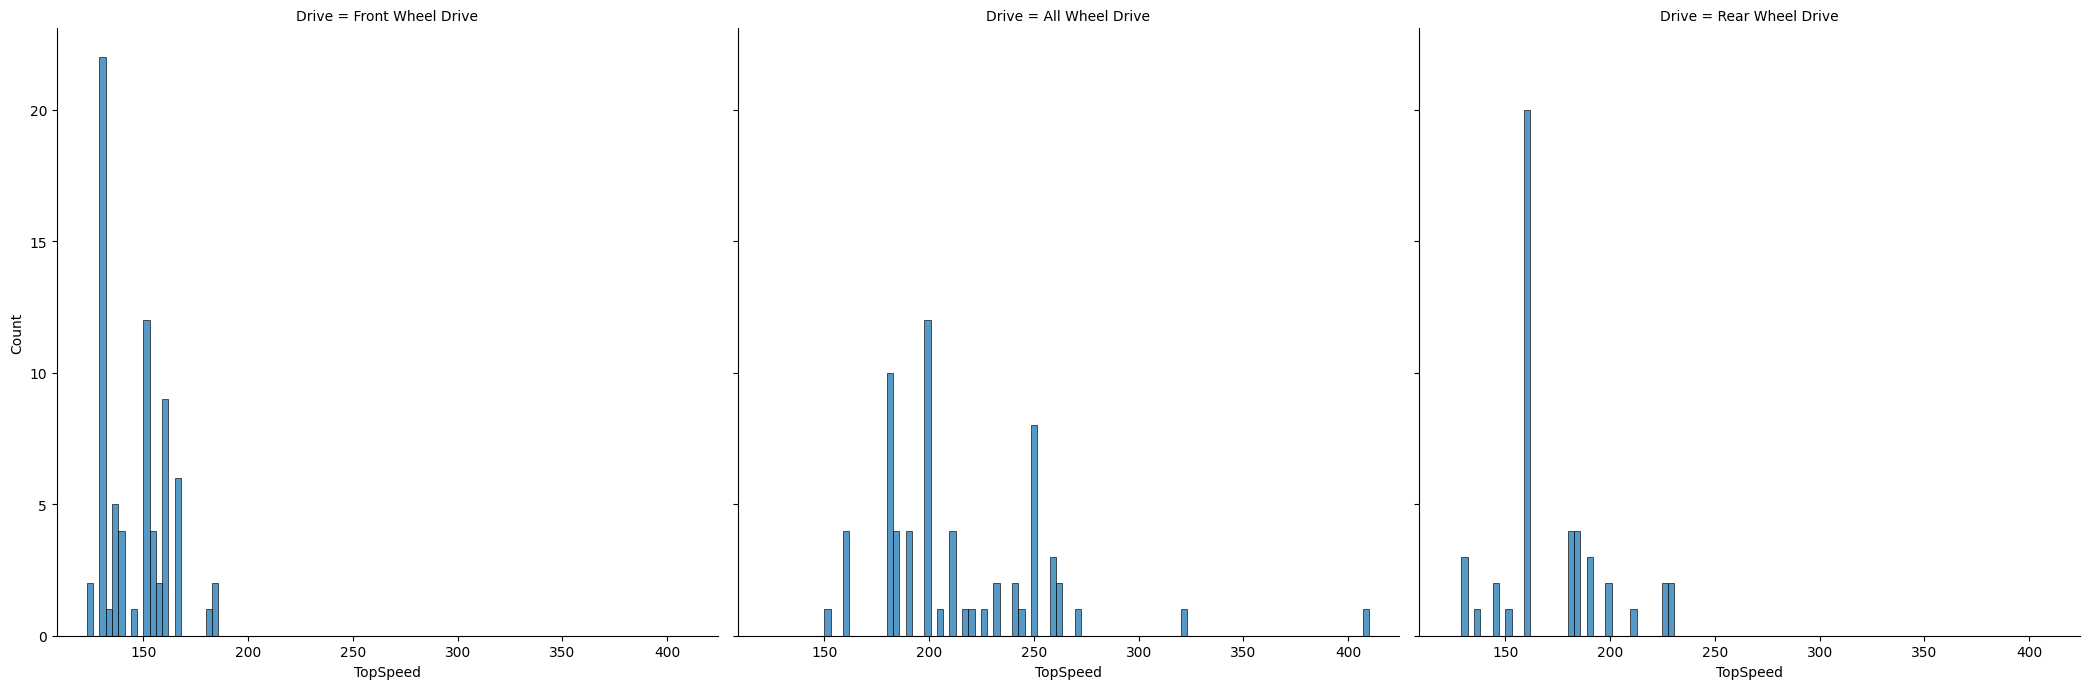

In [ ]:
sns.displot(
    df1, x="TopSpeed", col="Drive",
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

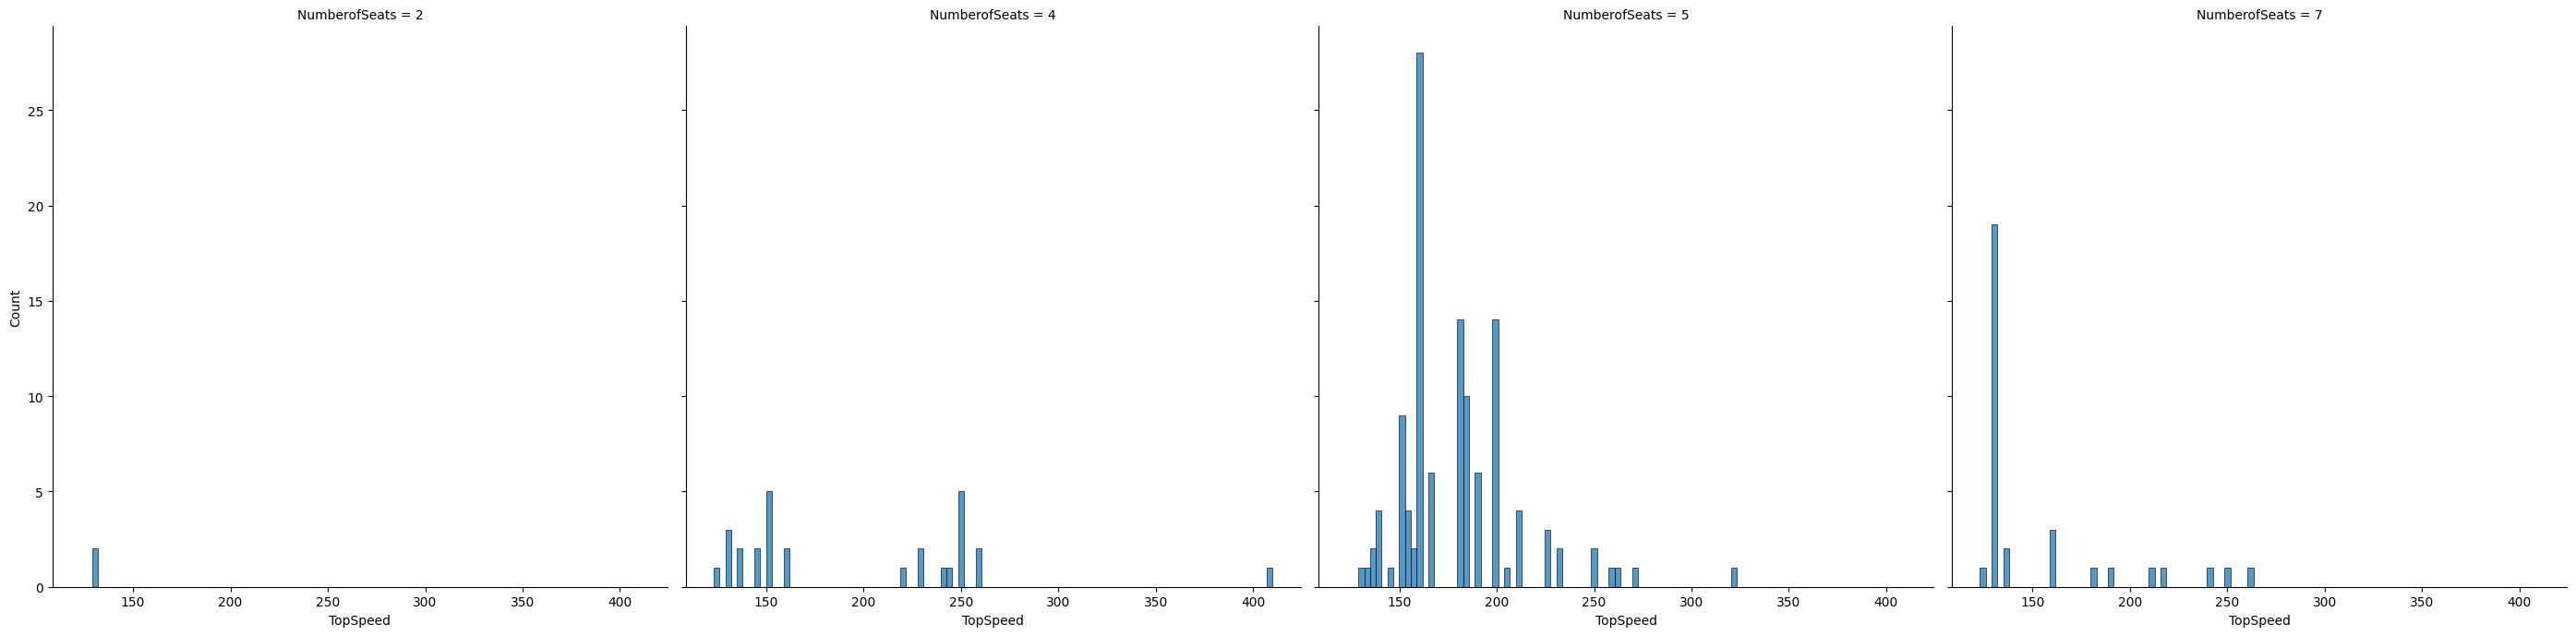

In [ ]:
sns.displot(
    df1, x="TopSpeed", col="NumberofSeats",
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

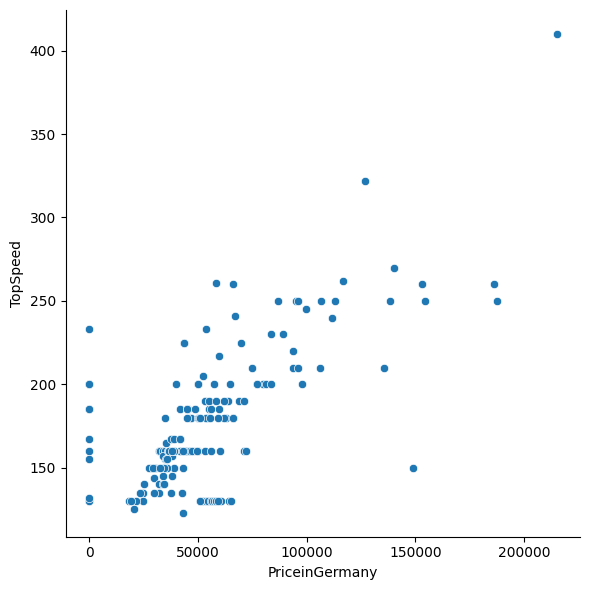

In [ ]:
#relation between price and features

sns.relplot(x="PriceinGermany", y="TopSpeed", height=6,data=df1)

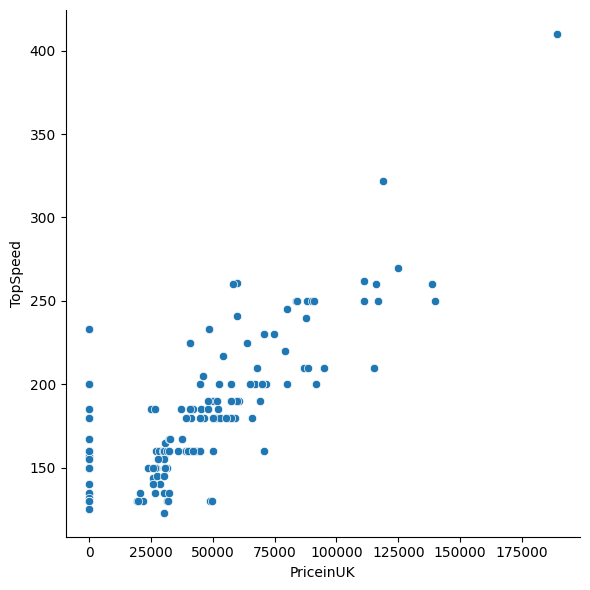

In [ ]:
#relation between price and features

sns.relplot(x="PriceinUK", y="TopSpeed", height=6,data=df1)

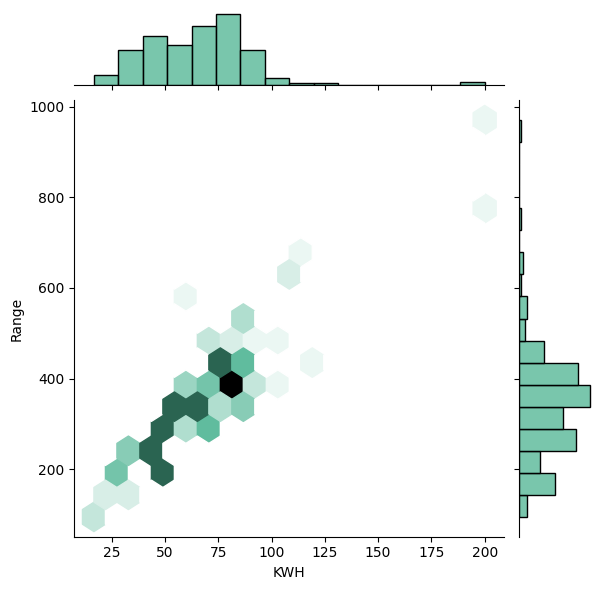

In [ ]:
sns.jointplot(x=df1["KWH"], y=df1["Range"], kind="hex", color="#4CB391")

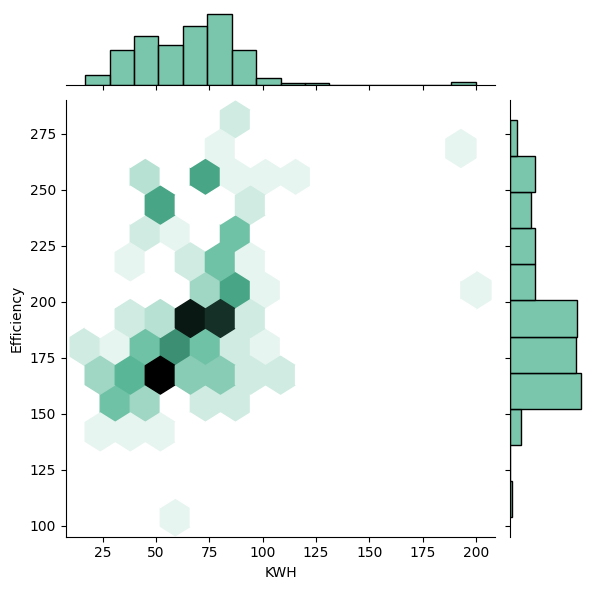

In [ ]:
sns.jointplot(x=df1["KWH"], y=df1["Efficiency"], kind="hex", color="#4CB391")

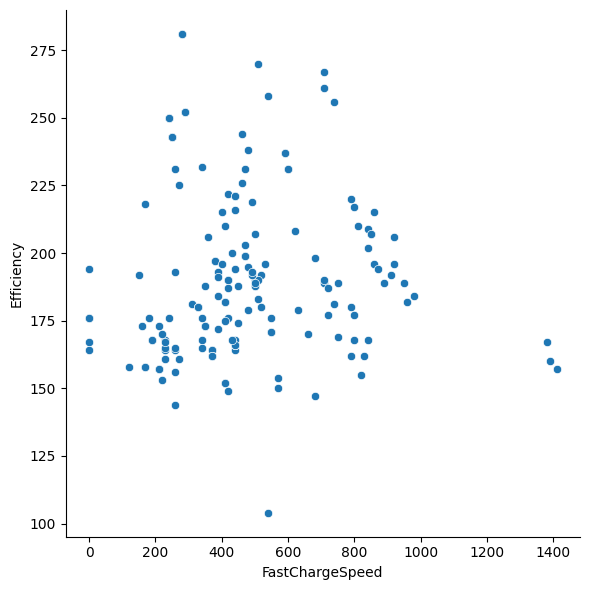

In [ ]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=df1)

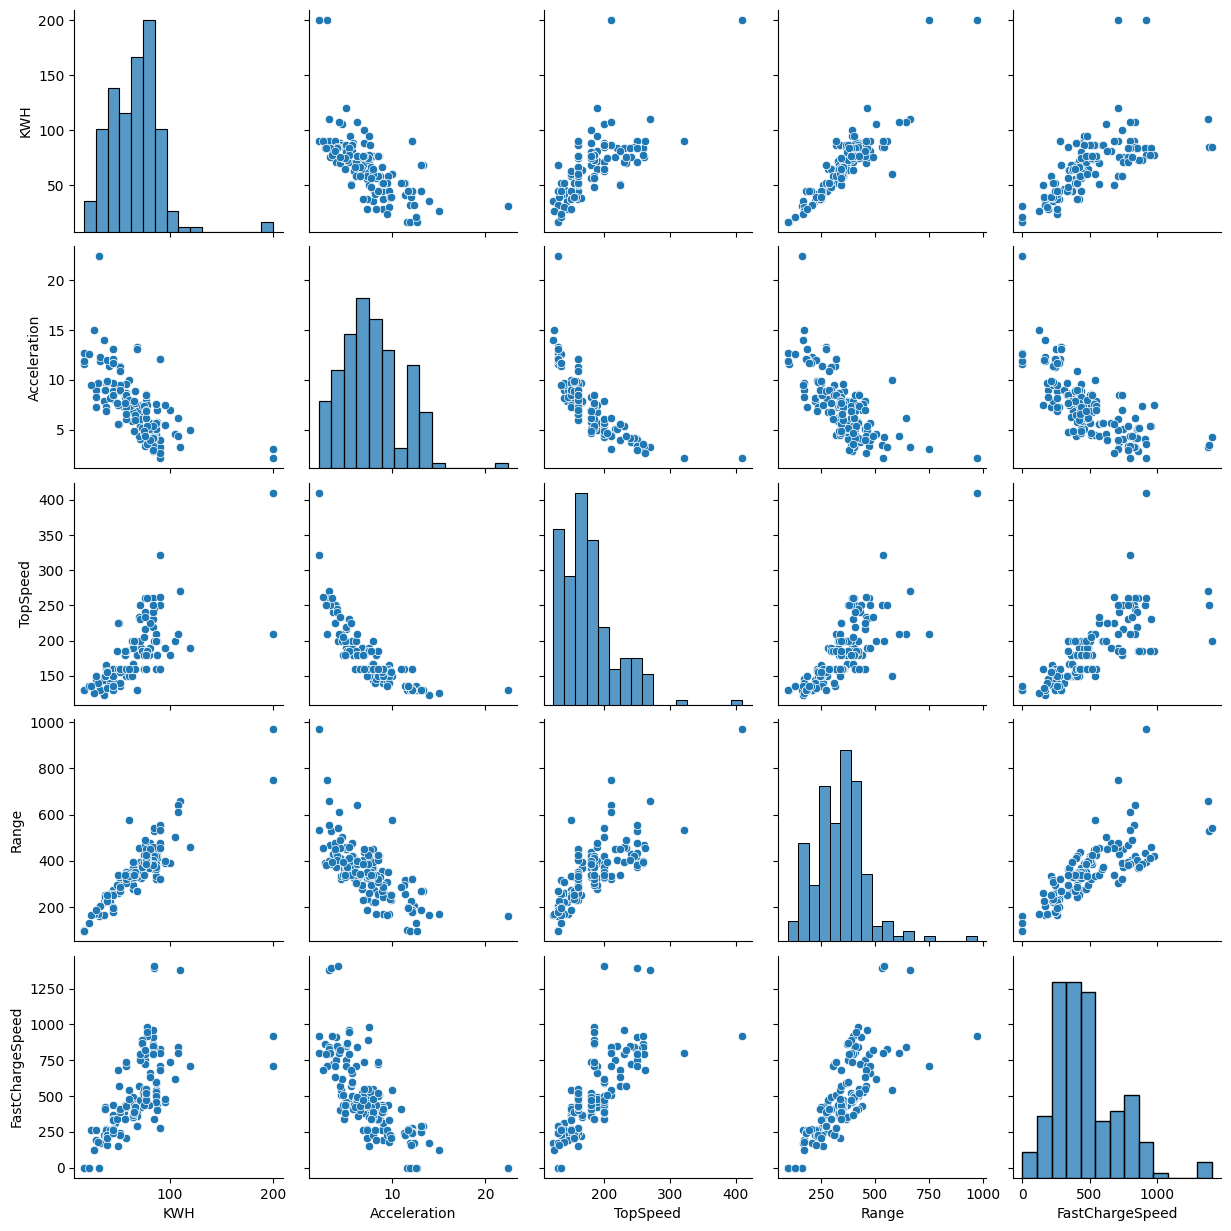

In [ ]:
sns.pairplot(df1[["KWH","Acceleration","TopSpeed","Range","FastChargeSpeed"]])

In [ ]:
# Convert 'Drive' column to dummy variables (One-Hot Encoding)
df1 = pd.get_dummies(df1, columns=['Drive'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define the target variable and feature variables
X = df1.drop(columns=['Name', 'KWH', 'Range','Drive_Front Wheel Drive', 'Drive_Rear Wheel Drive'])  # Features
y = df1['Range']  # Target variable (Battery range)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (144, 7)
Test set size: (36, 7)


In [ ]:
X

,Acceleration,TopSpeed,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
0,7.3,150,173,210,5,42990,0
1,22.4,130,194,0,5,0,31680
2,7.9,144,164,230,5,29990,25995
3,5.7,200,231,600,5,0,79900
4,2.8,260,215,860,4,186336,138830
...,...,...,...,...,...,...,...
175,7.9,200,191,390,5,40000,0
176,4.4,233,155,820,5,53560,0
177,7.7,185,168,340,5,0,26495
178,6.9,180,199,470,5,50900,0


In [ ]:
y

,Range
0,335
1,160
2,220
3,375
4,390
...,...
175,340
176,490
177,340
178,385


# XGBoost Regressor Model
XGBoost (Extreme Gradient Boosting) is an optimized gradient boosting model with improved performance.
## Best Model compared to other models

In [ ]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R-squared: {r2_xgb}')

XGBoost - Mean Squared Error: 12201.007019490695
XGBoost - R-squared: 0.4194151759147644


In [ ]:
test_input = np.array([[ 22.4	, 150, 173, 210, 5, 42990, 0]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test = xgb_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test[0]} km")

Predicted Range for the input electric vehicle: 334.9966125488281 km


In [ ]:
test_input = np.array([[ 22.4	, 130, 194, 0, 5, 0, 31680]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test = xgb_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test[0]} km")

Predicted Range for the input electric vehicle: 160.00140380859375 km


In [ ]:
test_input = np.array([[ 7.9	, 144, 164, 230, 5, 29990, 25995]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test = xgb_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test[0]} km")

Predicted Range for the input electric vehicle: 220.0012969970703 km
